In [1]:
import os
from PIL import Image
import minerl
import matplotlib.pyplot as plt

In [2]:
def show_samples(images):
    figure, axes = plt.subplots(1, len(images), figsize = (64, 64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = images[index]
        axis.imshow(image_array)
        image = Image.fromarray(image_array)
        #image.save(name + "_" + str(epoch) + "_" + str(index) + ".png")                          # save a generated image
    #plt.savefig(name + "_" + str(epoch) + ".png", bbox_inches='tight', pad_inches=0)             # save 5 images as one
    plt.show()
    plt.close()

In [3]:
MINERL_GYM_ENV = os.getenv('MINERL_GYM_ENV', 'MineRLObtainDiamond-v0')
# You need to ensure that your submission is trained in under MINERL_TRAINING_MAX_STEPS steps
MINERL_TRAINING_MAX_STEPS = int(os.getenv('MINERL_TRAINING_MAX_STEPS', 8000))#000))
# You need to ensure that your submission is trained by launching less than MINERL_TRAINING_MAX_INSTANCES instances
MINERL_TRAINING_MAX_INSTANCES = int(os.getenv('MINERL_TRAINING_MAX_INSTANCES', 1))#5))
# You need to ensure that your submission is trained within allowed training time.
# Round 1: Training timeout is 15 minutes
# Round 2: Training timeout is 4 days
MINERL_TRAINING_TIMEOUT = int(os.getenv('MINERL_TRAINING_TIMEOUT_MINUTES', 15))#4*24*60))
# The dataset is available in data/ directory from repository root.
MINERL_DATA_ROOT = os.getenv('MINERL_DATA_ROOT', 'data/')


data = minerl.data.make(MINERL_GYM_ENV, data_dir=MINERL_DATA_ROOT)

In [4]:
i = 0
images = []
for state, action, reward, next_state, done in data.sarsd_iter(num_epochs=1, max_sequence_len=8):
    if i == 10: break
    i+=1
    #print(state['pov'].shape)
    images.append(state['pov'])
    
    #show_samples(state['pov'])

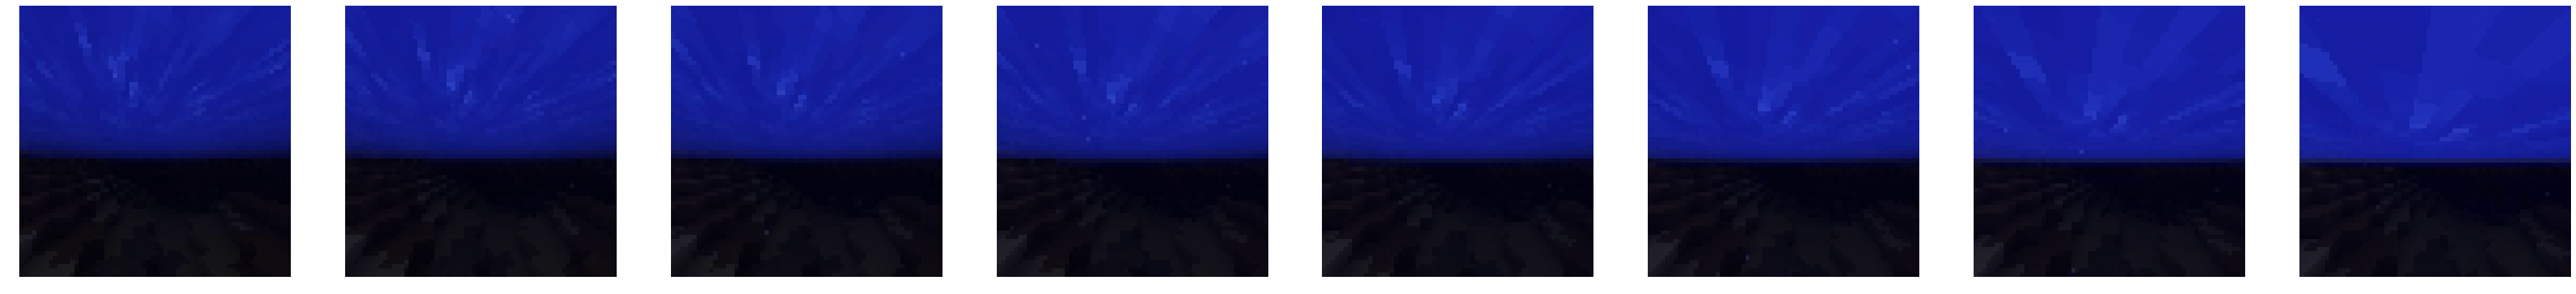

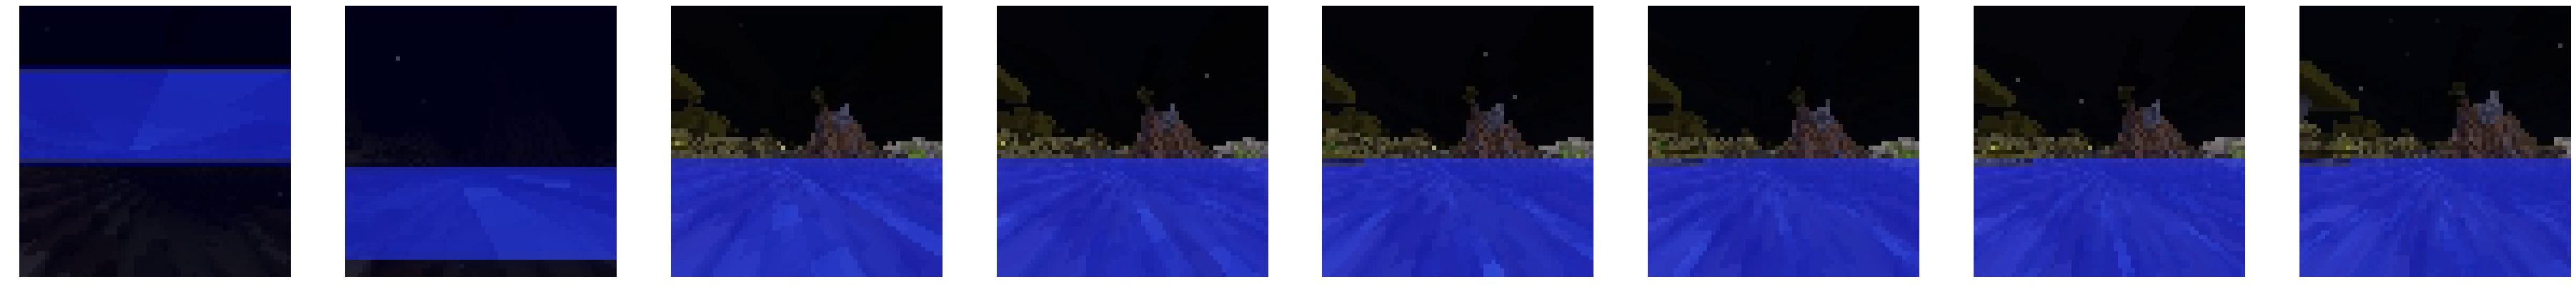

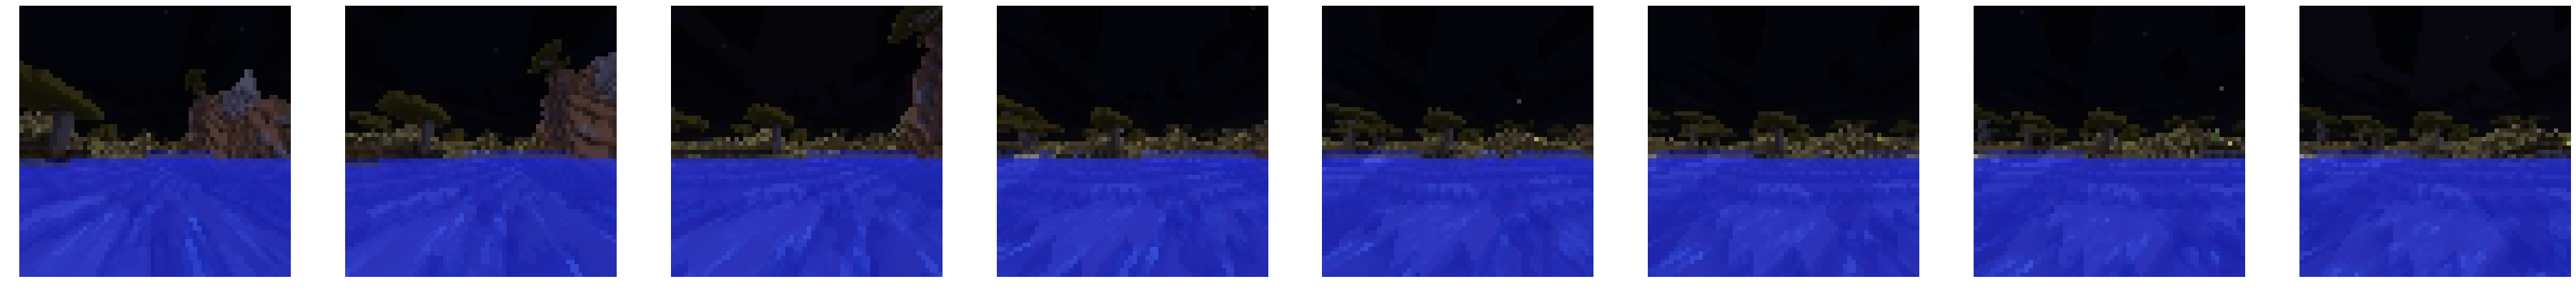

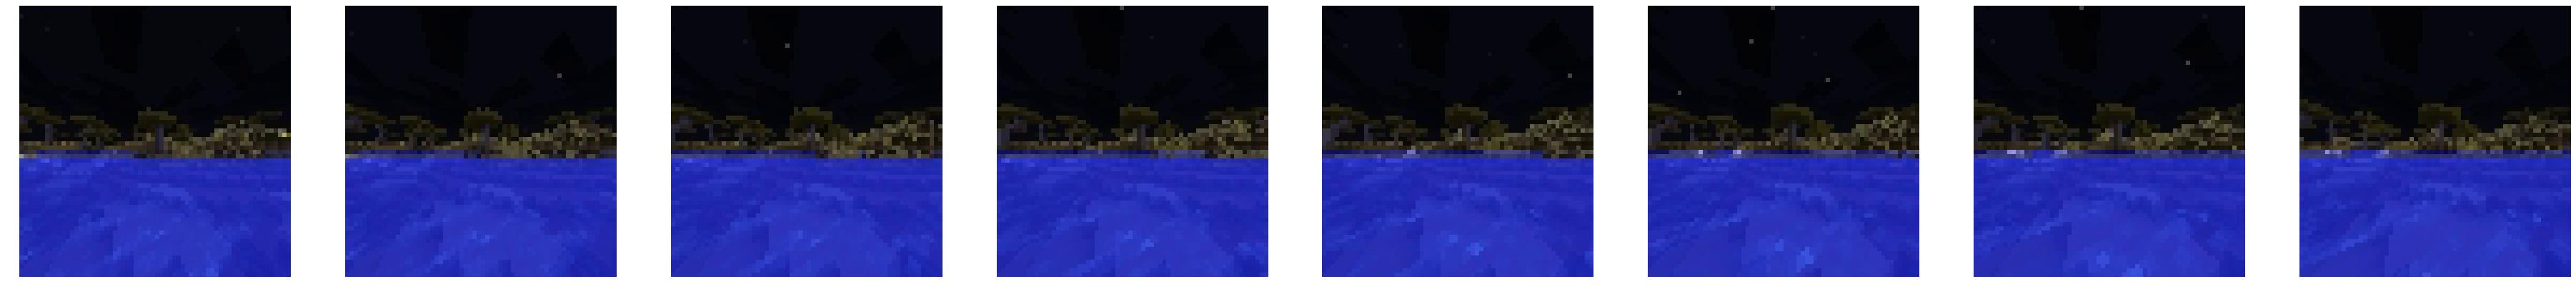

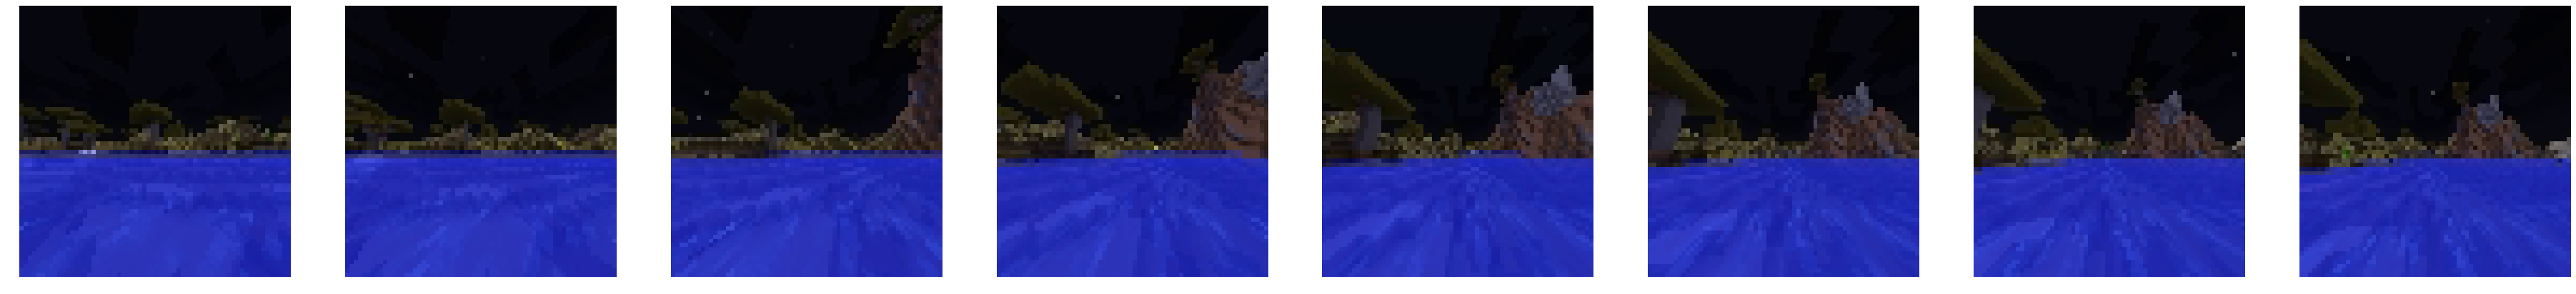

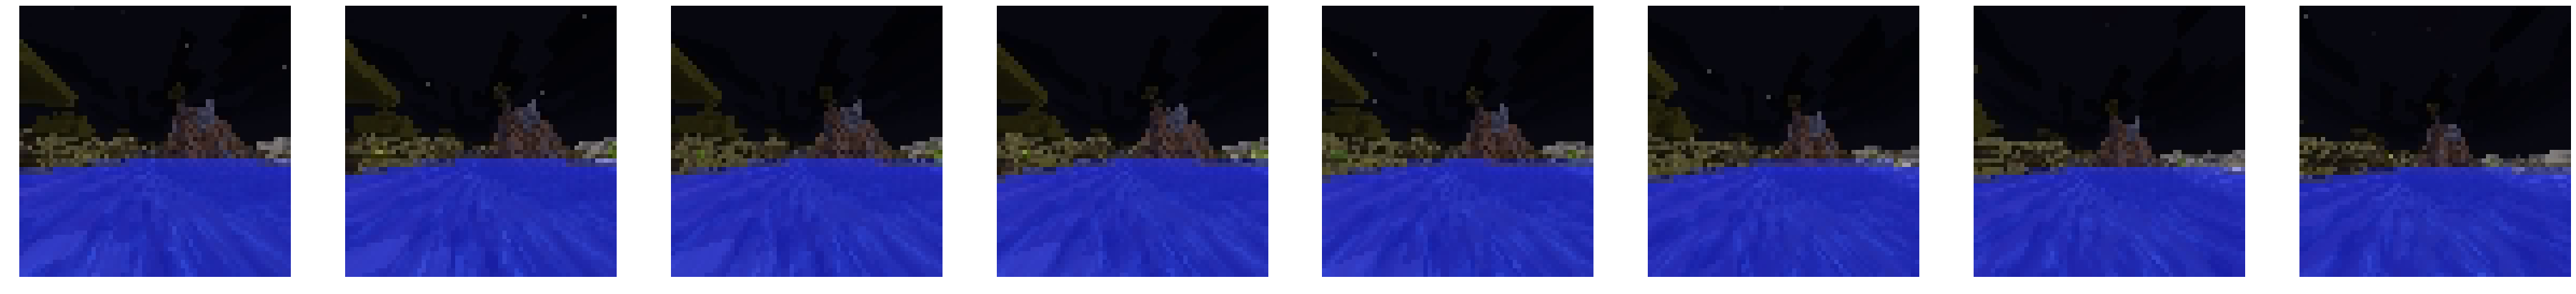

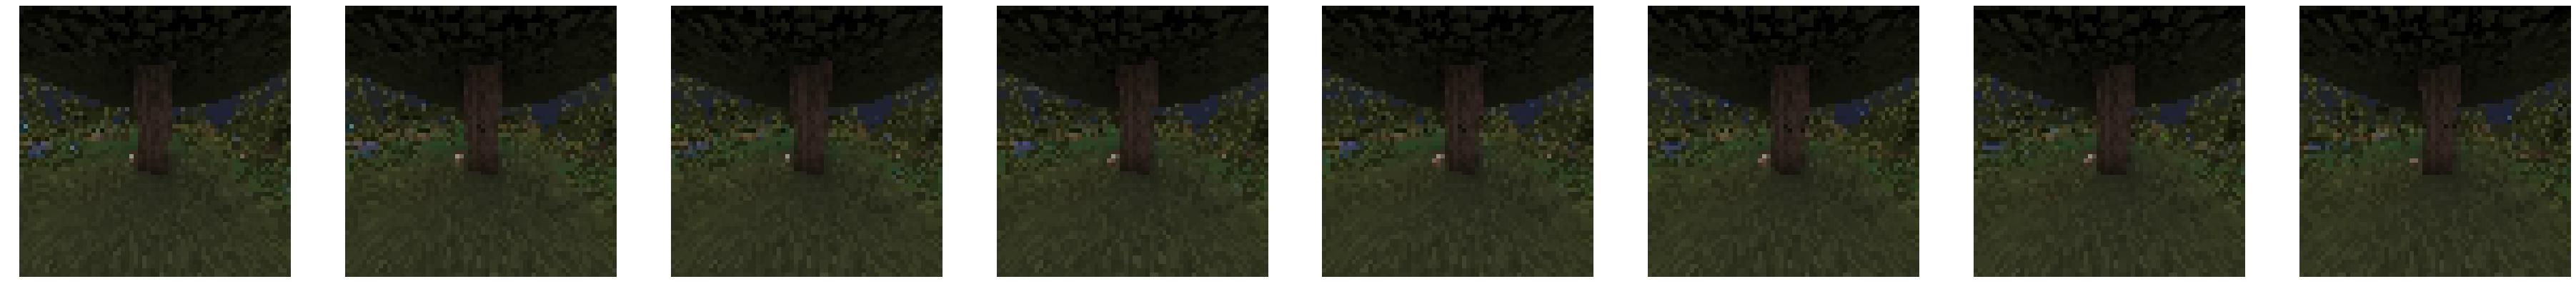

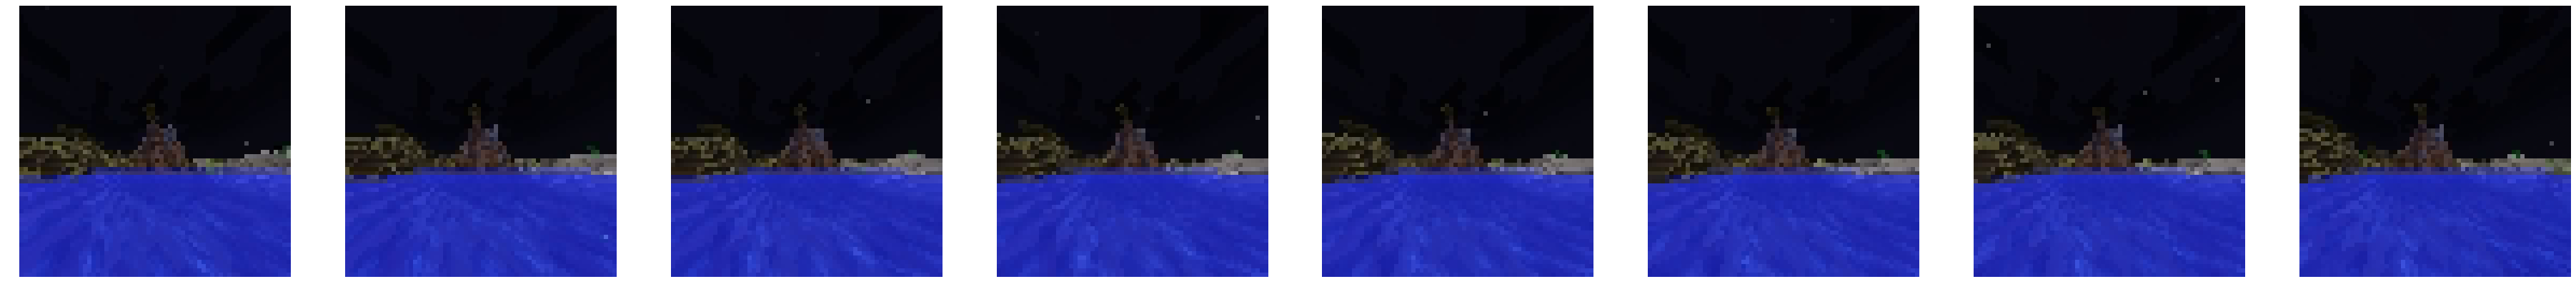

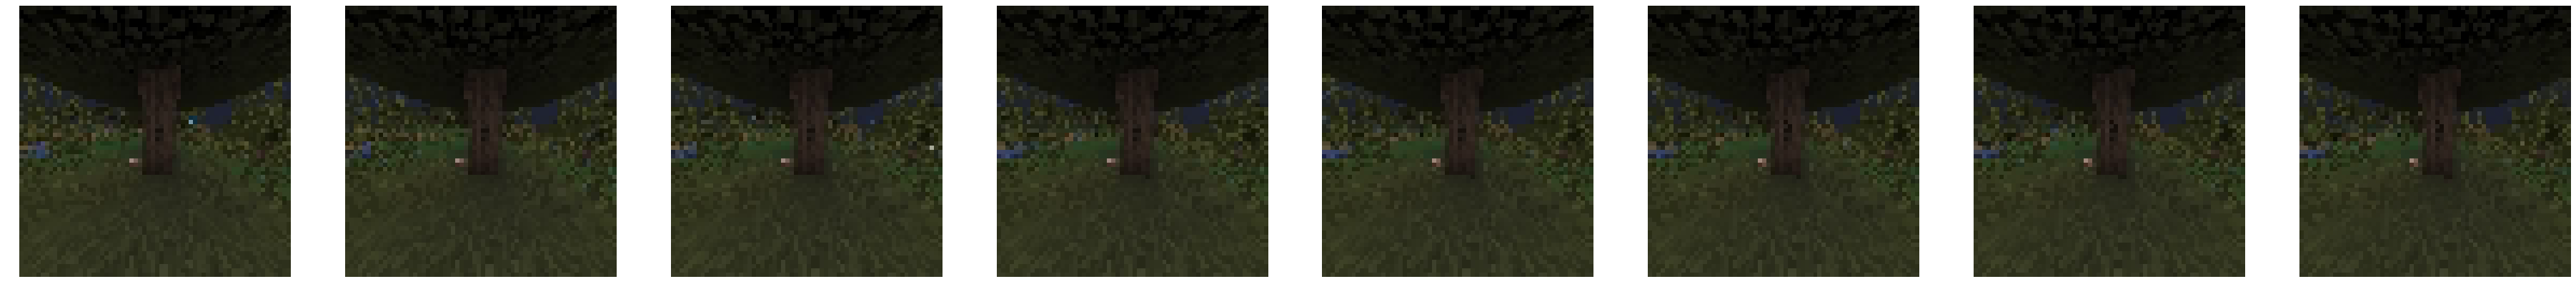

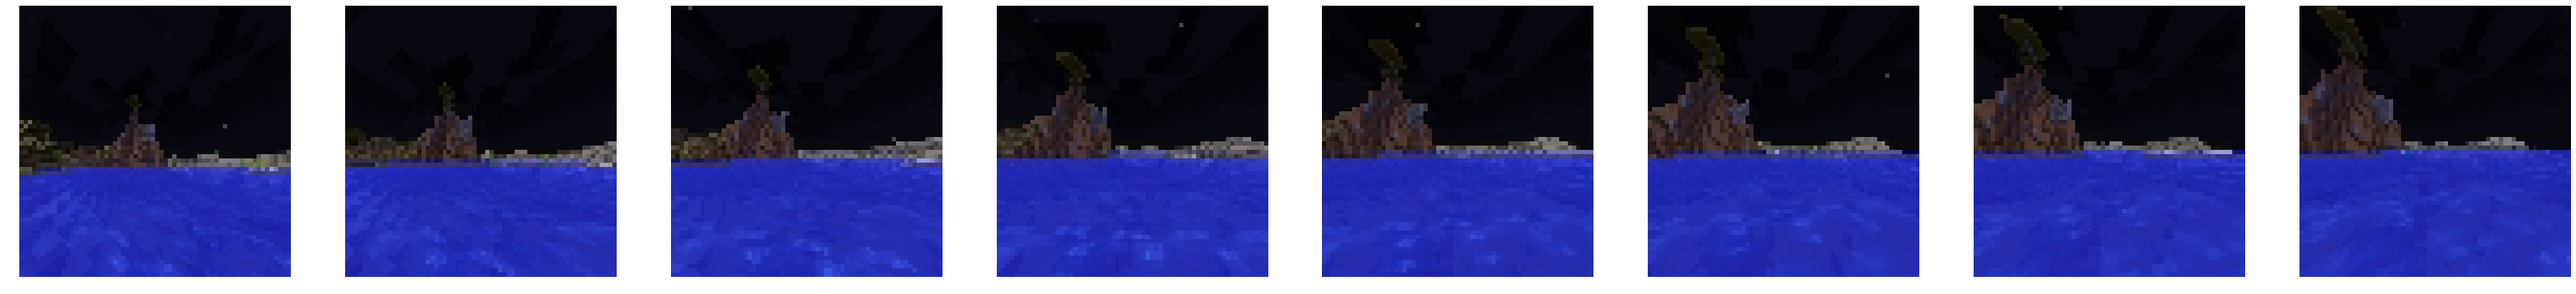

In [5]:
for i in images:
    show_samples(i)